<a href="https://colab.research.google.com/github/felipersteles/aula-kmeans/blob/main/K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Aprendizado não-supervisionado (K-Means)** 

### Etapa 1: Importando bibliotecas, lendo os dados

In [ ]:
import pandas as pd #analise de dados
import numpy as np
import matplotlib.pyplot as plt #graficos
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

data = pd.read_csv('/content/drive/MyDrive/pratica/kmeans/store.csv') #carregando os dados

Mounted at /content/drive


In [ ]:
data.head() #cabeçalho

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
data.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [ ]:
#podemos traduzir
data.columns = ['IdCliente', 'Genero', 'Idade', 'Renda Anual', 'Nivel de Gasto(1-100)']

In [ ]:
data.head()

,IdCliente,Genero,Idade,Renda Anual,Nivel de Gasto(1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
#Como o csv tem ID proprio tambem podemos definir o idCliente como indice para isto usamos este comando:
data.set_index('IdCliente', inplace = True)
#aparentemente este comando so pode ser executada uma vez

In [ ]:
#por isso é bom criar um novo data
df = data[['Renda Anual', 'Nivel de Gasto(1-100)']]
df.head()

,Renda Anual,Nivel de Gasto(1-100)
IdCliente,,
1,15,39
2,15,81
3,16,6
4,16,77
5,17,40


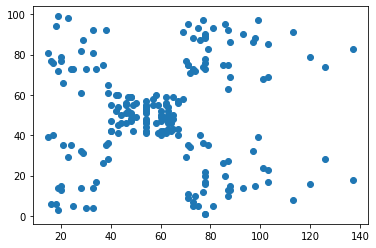

In [ ]:
#plotando o conjunto de dados 
plt.scatter(df['Renda Anual'], df['Nivel de Gasto(1-100)'])

# **Etapa 2: Testes e verificação da quantidade de grupos**

## Etapa 2.1: Método Elbow

In [ ]:
X = df.values

In [ ]:
X.shape

(200, 2)

In [ ]:
for i in range(1,11):
  print(i)

1
2
3
4
5
6
7
8
9
10


Text(0, 0.5, 'Inércia')

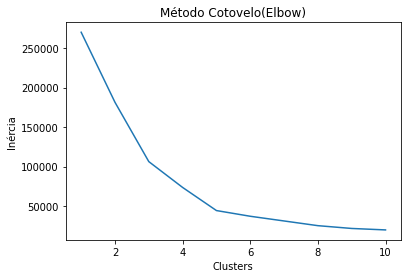

In [ ]:
variacoes = []

for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++') #execucao do kmeans que contem todos os centroides sendo os argumentos passados o valor de k
  kmeans.fit(X) #ajuste do kmeans pro nosso banco de dados
  variacoes.append(kmeans.inertia_) #armazena a inercia numa lista 

plt.plot(range(1,11), variacoes)
plt.title('Método Cotovelo(Elbow)')
plt.xlabel('Clusters')
plt.ylabel('Inércia')

In [ ]:
kmeans_final = KMeans(n_clusters = 5)

In [ ]:
kmeans_final.fit(X)

KMeans(n_clusters=5)

In [ ]:
cluster_pred = kmeans_final.predict(X)

In [ ]:
cluster_centro = kmeans_final.cluster_centers_ #atribuindo os centroides finais

In [ ]:
cluster_centro #valores em coordenadas

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [88.2       , 17.11428571],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348]])

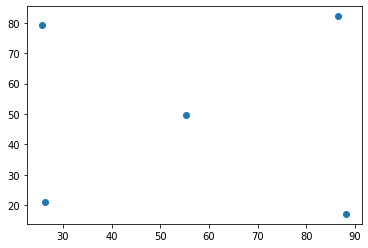

In [ ]:
plt.scatter(cluster_centro[:,0],cluster_centro[:,1])

In [ ]:
X[cluster_pred==3,0]

array([15, 16, 17, 18, 19, 19, 20, 20, 21, 23, 24, 25, 28, 28, 29, 30, 33,
       33, 34, 37, 38, 39])

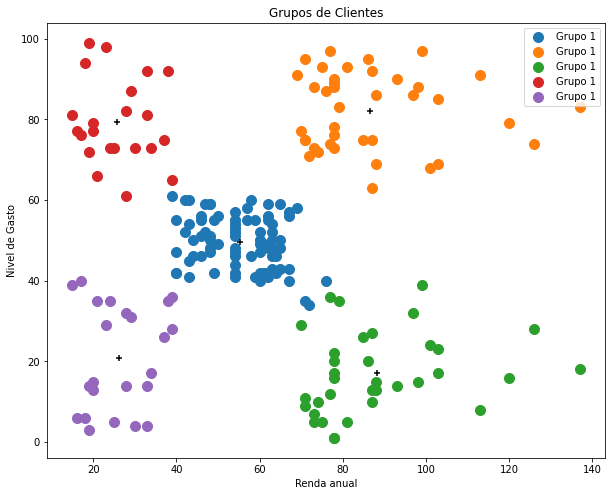

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(X[cluster_pred==0,0],X[cluster_pred==0,1],s = 100, label = 'Grupo 1')
plt.scatter(X[cluster_pred==1,0],X[cluster_pred==1,1],s = 100, label = 'Grupo 1')
plt.scatter(X[cluster_pred==2,0],X[cluster_pred==2,1],s = 100, label = 'Grupo 1')
plt.scatter(X[cluster_pred==3,0],X[cluster_pred==3,1],s = 100, label = 'Grupo 1')
plt.scatter(X[cluster_pred==4,0],X[cluster_pred==4,1],s = 100, label = 'Grupo 1')
plt.scatter(cluster_centro[:,0],cluster_centro[:,1],marker = '+',c='black')
plt.legend()
plt.title('Grupos de Clientes')
plt.xlabel('Renda anual')
plt.ylabel('Nivel de Gasto')
plt.show()

## Etapa 2.1: Análise de silhueta

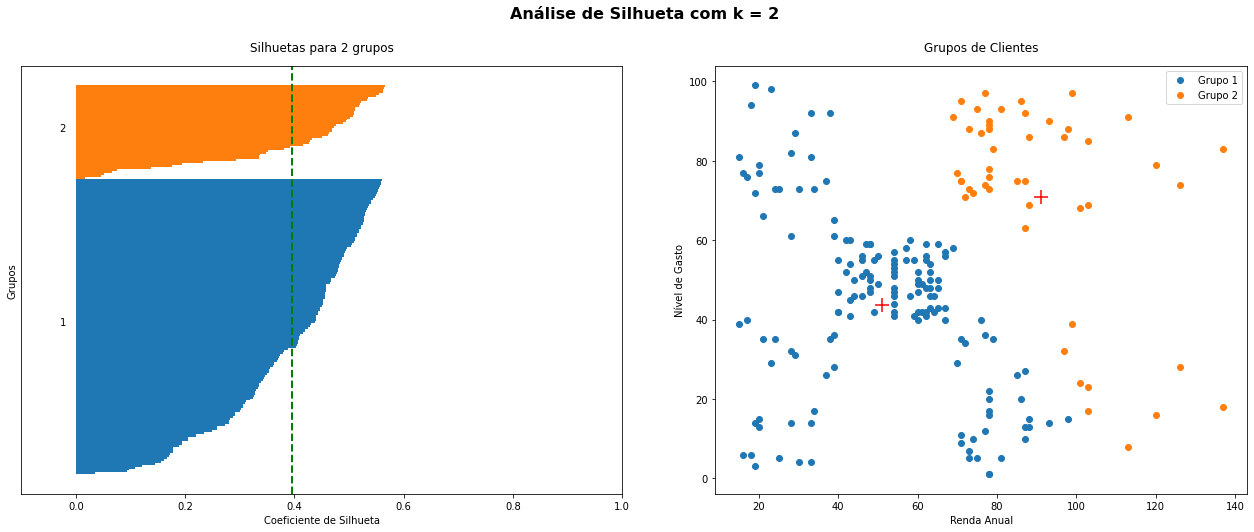

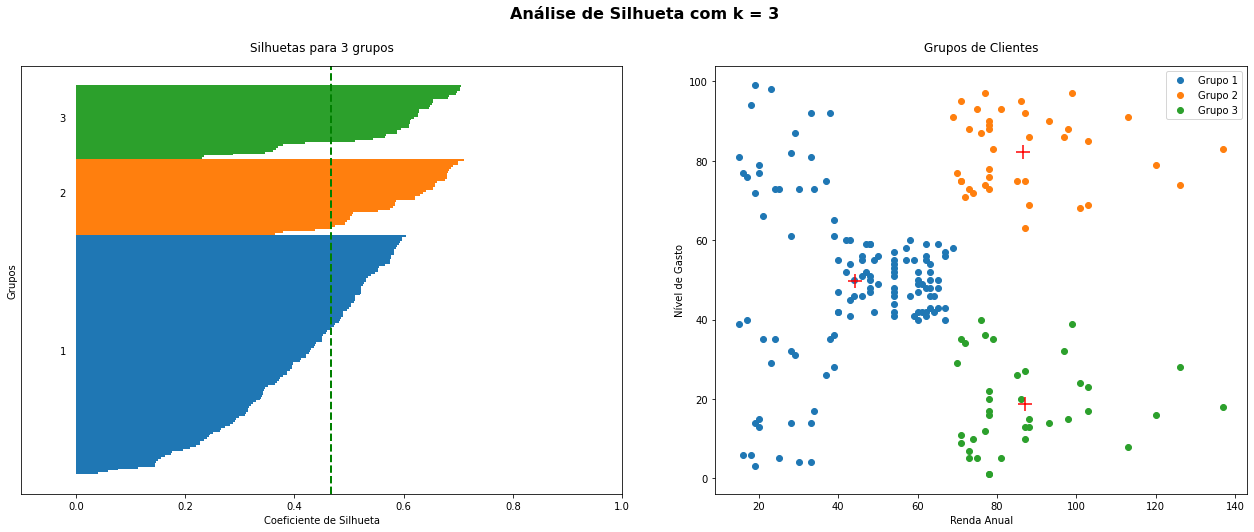

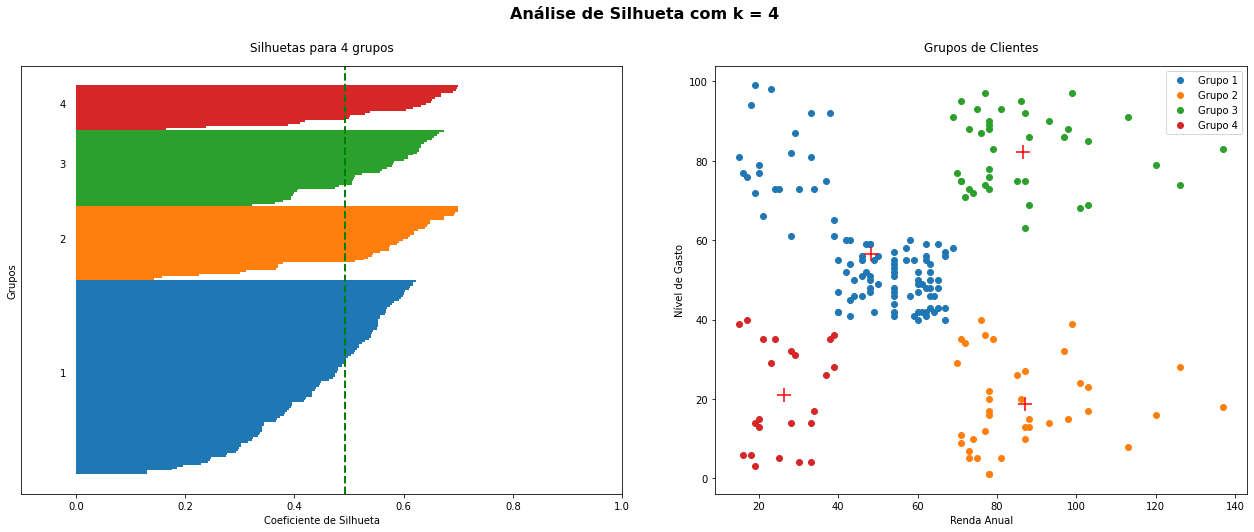

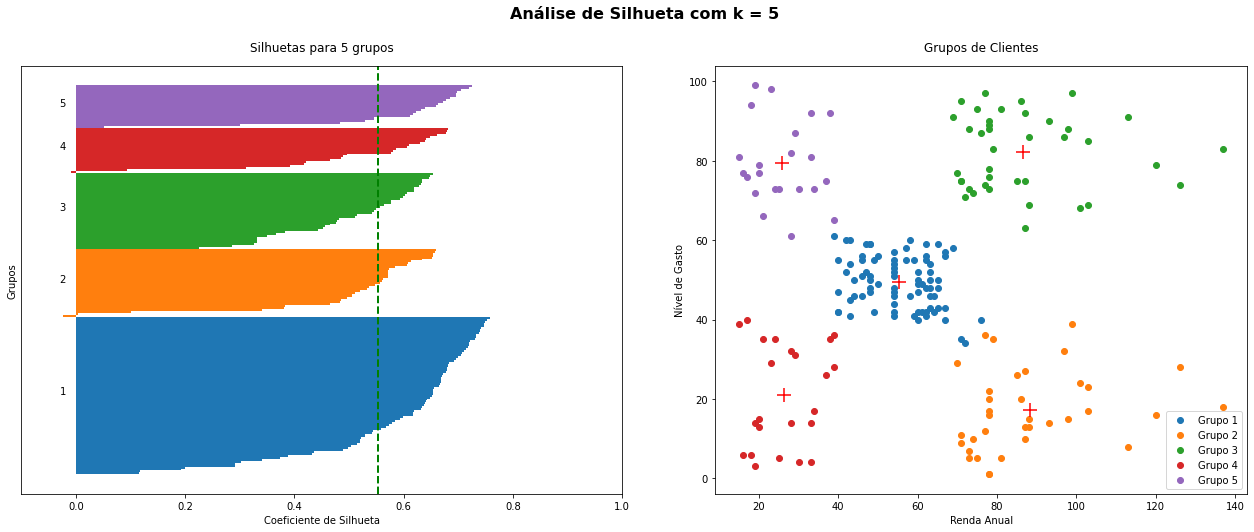

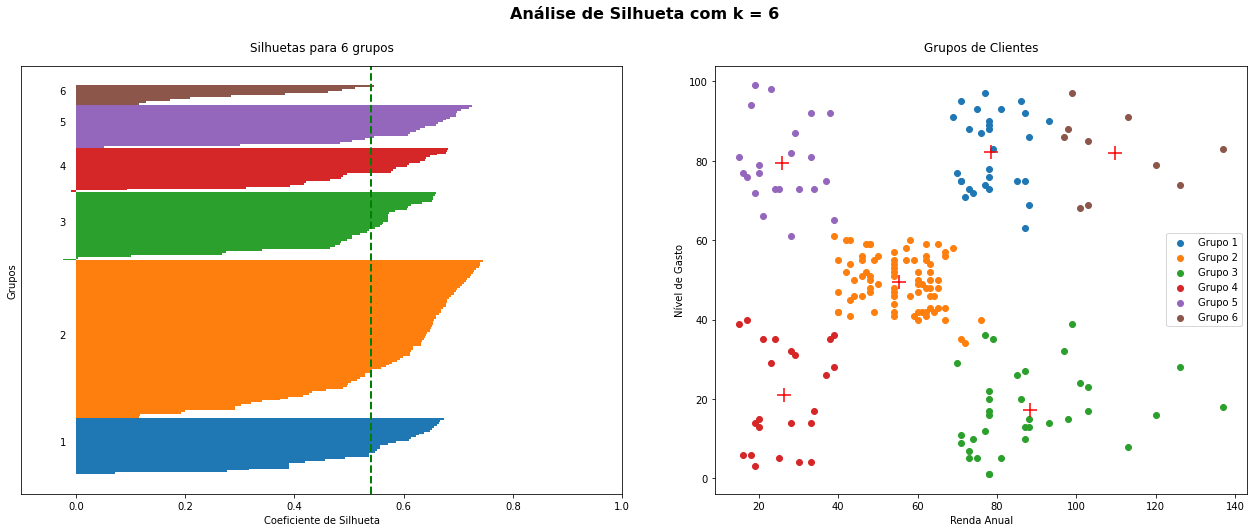

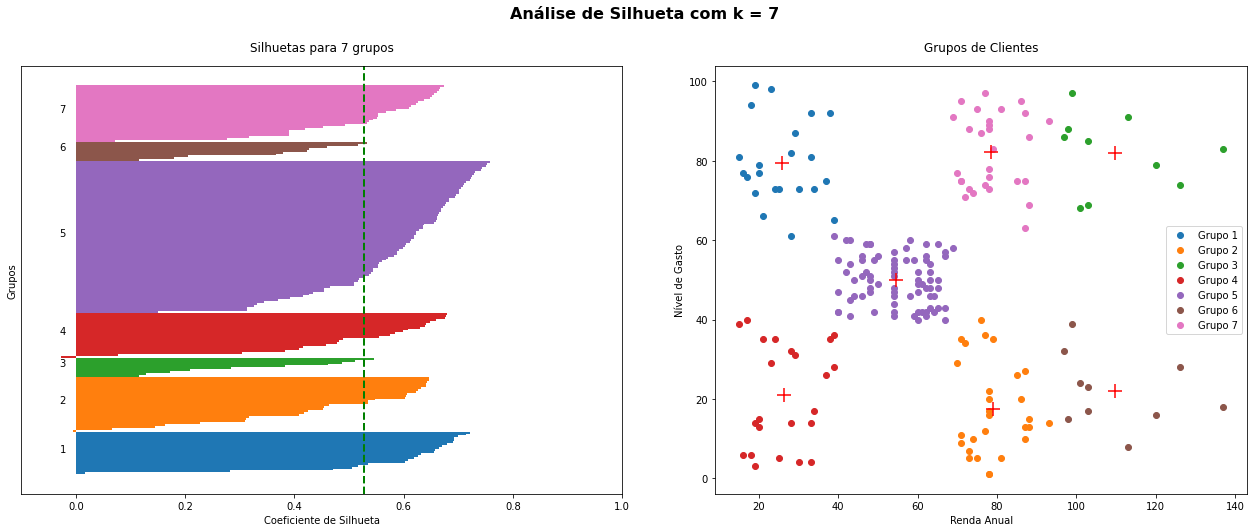

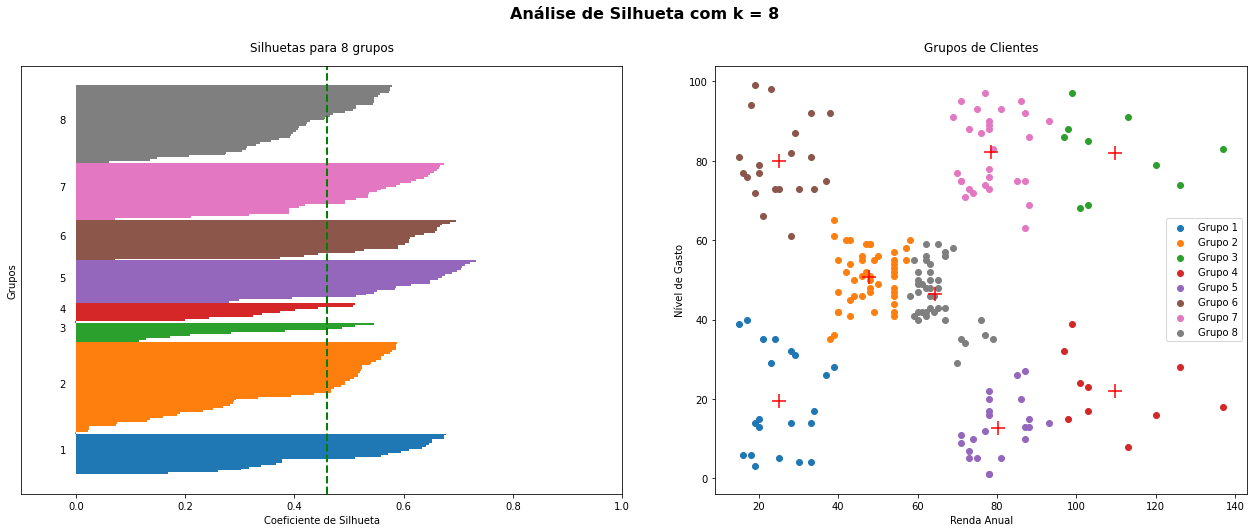

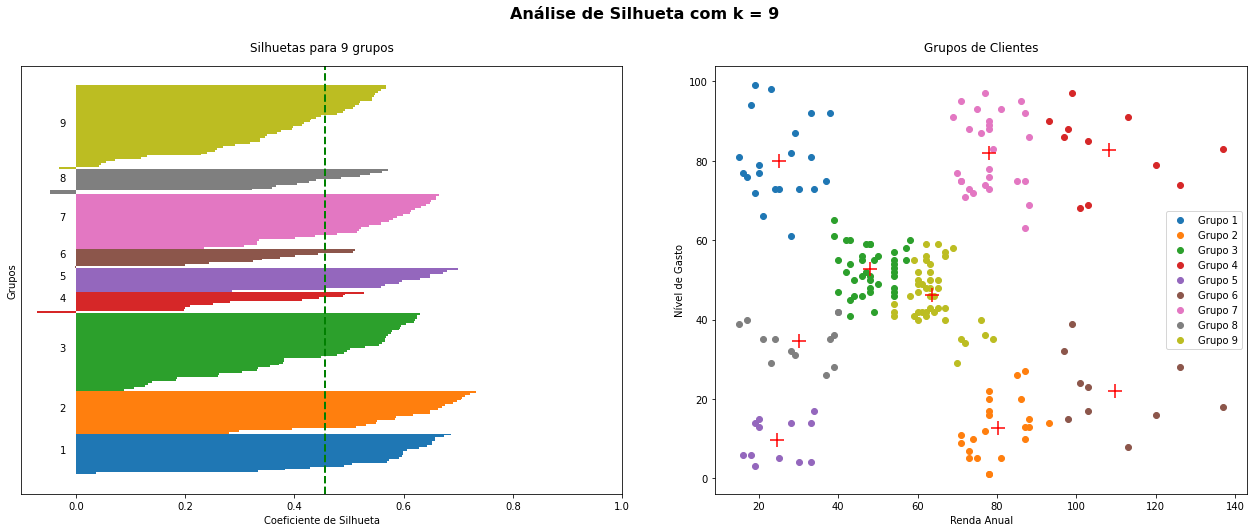

In [ ]:
for k in range(2,10):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    # Executar o K-Means com o valor atual de k
    km = KMeans(n_clusters=k)
    cluster_pred = km.fit_predict(X)
    cluster_centro = km.cluster_centers_

    # Calcular os valores de silhueta
    silhouette_vals = silhouette_samples(X, cluster_pred)

    # Plotar as silhuetas
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(cluster_pred)):
        cluster_silhouette_vals = silhouette_vals[cluster_pred == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # Plotar o coeficiente de silhueta médio
    avg_score = np.mean(silhouette_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Coeficiente de Silhueta')
    ax1.set_ylabel('Grupos')
    ax1.set_title('Silhuetas para {} grupos'.format(k), y=1.02);
    
    # Ilustar os grupos
    for j in range(k):
        ax2.scatter(X[cluster_pred==j, 0], X[cluster_pred==j, 1], label='Grupo {}'.format(j+1))
    ax2.scatter(cluster_centro[:, 0], cluster_centro[:, 1], marker='+', c='r', s=200)
    ax2.legend()
    ax2.set_xlabel('Renda Anual')
    ax2.set_ylabel('Nível de Gasto')
    ax2.set_title('Grupos de Clientes', y=1.02)
    ax2.set_aspect('equal')
    plt.tight_layout()
    plt.suptitle('Análise de Silhueta com k = {}'.format(k),
                 fontsize=16, fontweight='semibold', y=1.05);